In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


test_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/train.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/validation.csv')

test_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,39,29,18.91,NaN,NaN,54,Bradley,3334,One Year,United States,...,7,477.05,0,132.37,0.0,609.42,0,1,93426,0
1,75,22,33.48,NaN,NaN,54,Lakeshore,2455,Month-to-Month,United States,...,30,3181.80,0,1004.40,0.0,4186.20,0,1,93634,0
2,67,14,9.96,NaN,NaN,26,Lompoc,5011,Two Year,United States,...,71,7904.25,0,707.16,0.0,8611.41,0,1,93437,0
3,47,7,34.64,NaN,NaN,29,Echo Lake,2452,Month-to-Month,United States,...,9,593.85,0,311.76,0.0,905.61,0,1,95721,0
4,21,0,10.49,NaN,NaN,23,Lancaster,4129,One Year,United States,...,25,507.90,0,262.25,0.0,770.15,1,0,93536,0


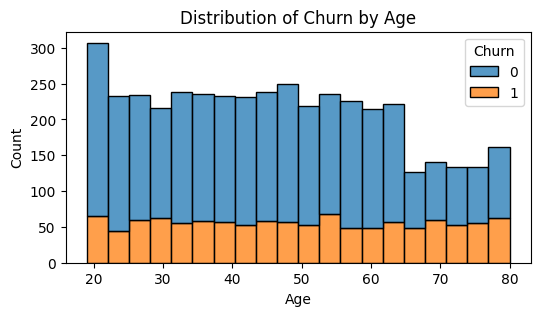

In [ ]:
#1
plt.figure(figsize=(6, 3))
sns.histplot(train_df, x='Age', hue='Churn', multiple='stack', bins=20)
plt.title('Distribution of Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

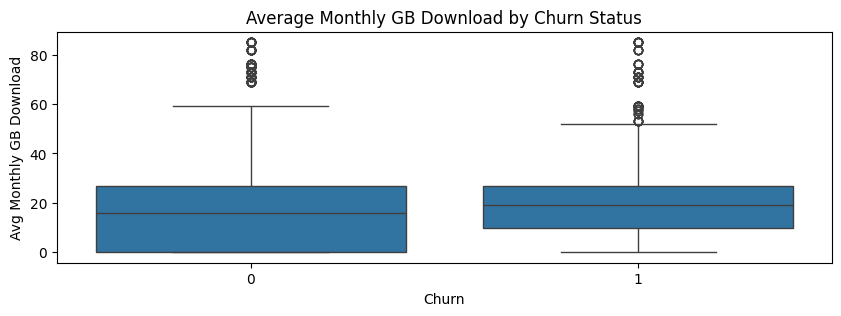

In [ ]:
# 2.
plt.figure(figsize=(10, 3))
sns.boxplot(x='Churn', y='Avg Monthly GB Download', data=train_df)
plt.title('Average Monthly GB Download by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Avg Monthly GB Download')
plt.show()

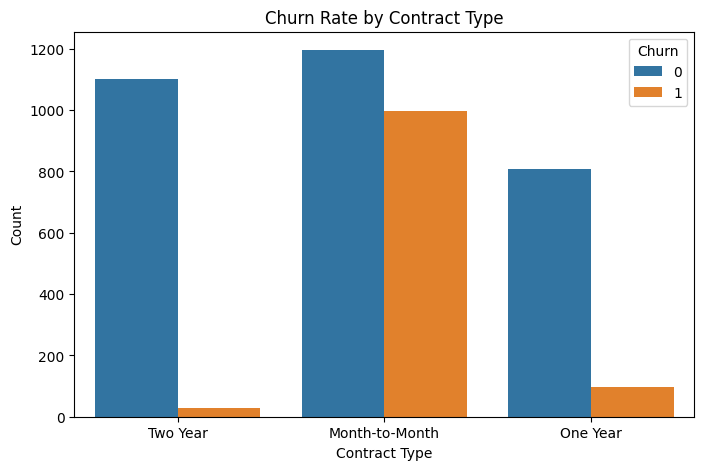

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=train_df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

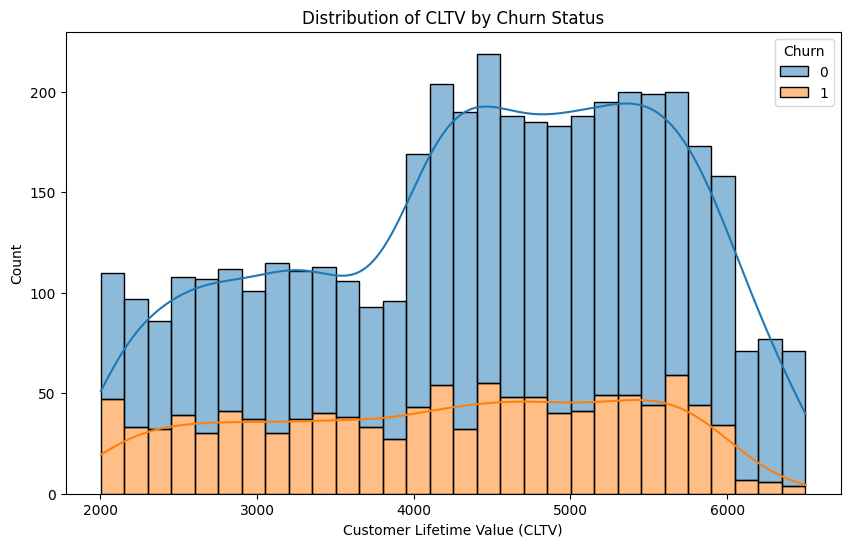

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='CLTV', hue='Churn', bins=30, kde=True, multiple="stack")
plt.title('Distribution of CLTV by Churn Status')
plt.xlabel('Customer Lifetime Value (CLTV)')
plt.ylabel('Count')
plt.show()

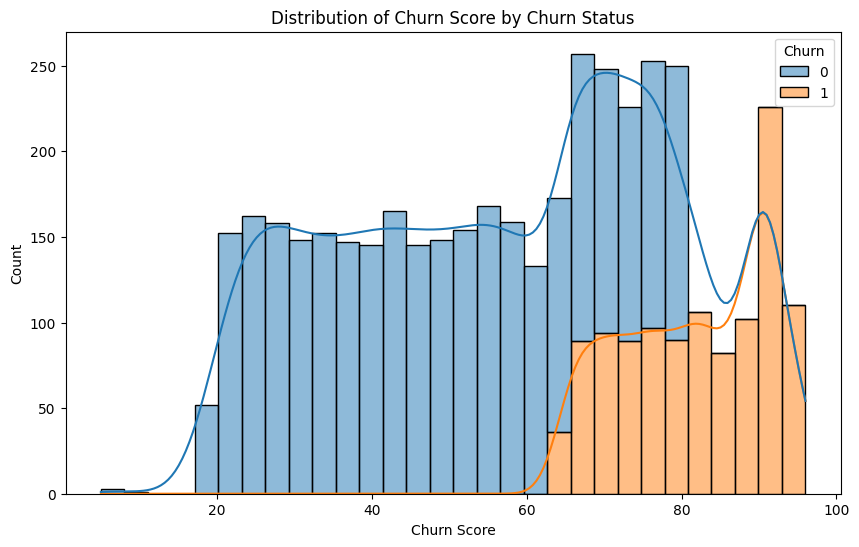

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='Churn Score', hue='Churn', bins=30, kde=True, multiple="stack")
plt.title('Distribution of Churn Score by Churn Status')
plt.xlabel('Churn Score')
plt.ylabel('Count')
plt.show()

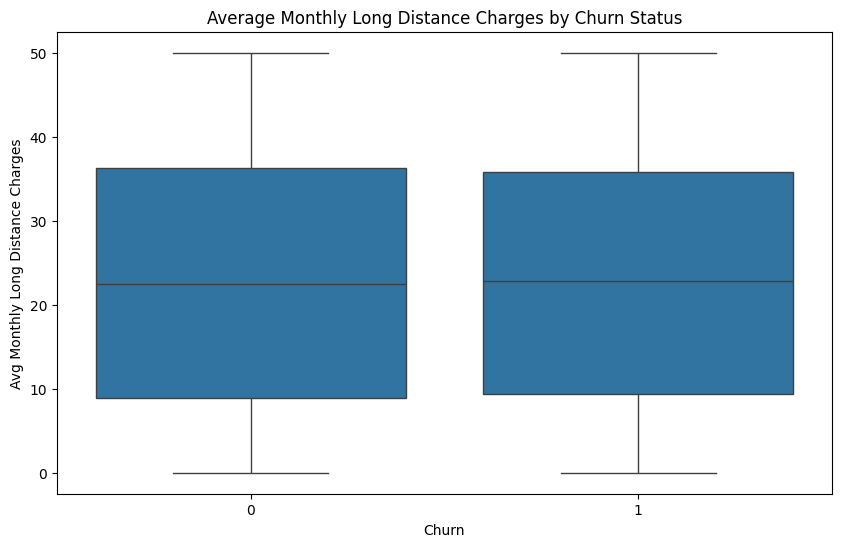

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Avg Monthly Long Distance Charges', data=train_df)
plt.title('Average Monthly Long Distance Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Avg Monthly Long Distance Charges')
plt.show()

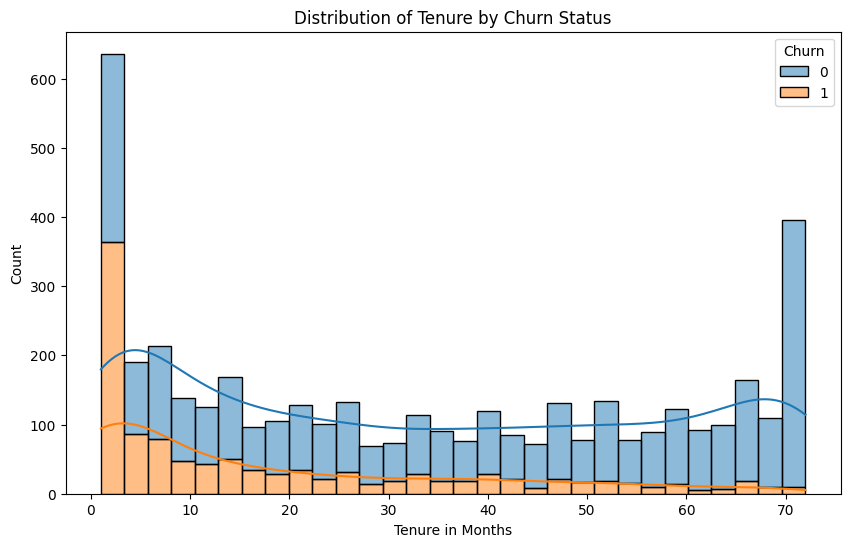

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df, x='Tenure in Months', hue='Churn', bins=30, kde=True, multiple="stack")
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Count')
plt.show()

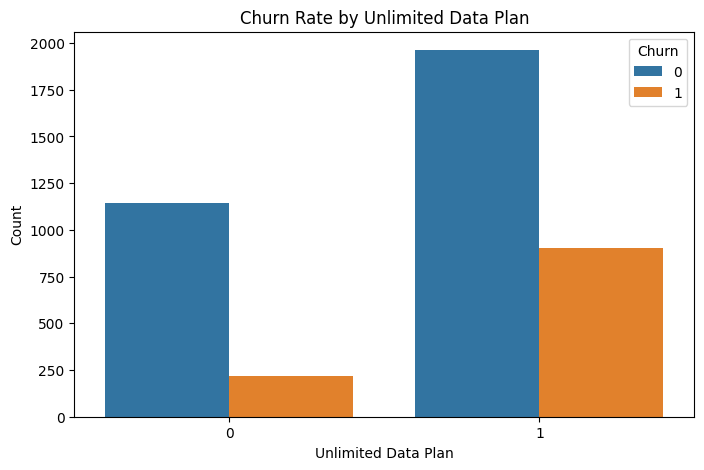

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Unlimited Data', hue='Churn', data=train_df)
plt.title('Churn Rate by Unlimited Data Plan')
plt.xlabel('Unlimited Data Plan')
plt.ylabel('Count')
plt.show()

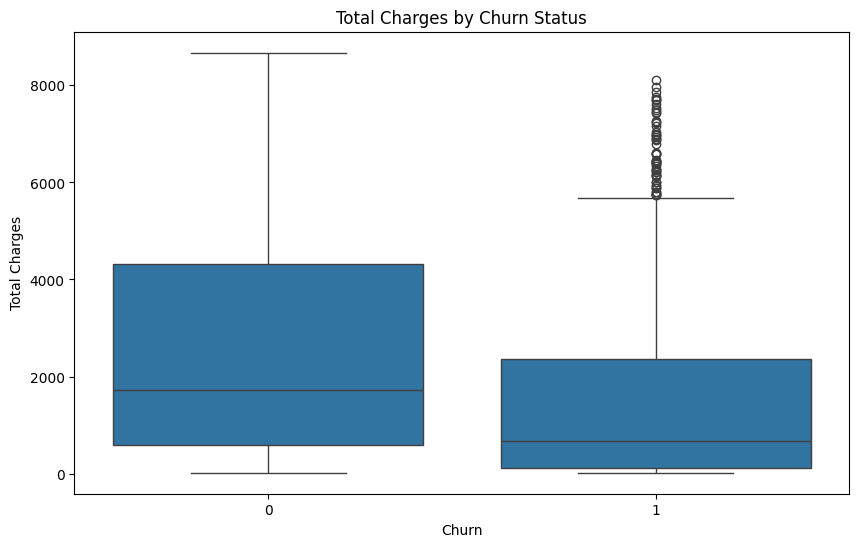

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total Charges', data=train_df)
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

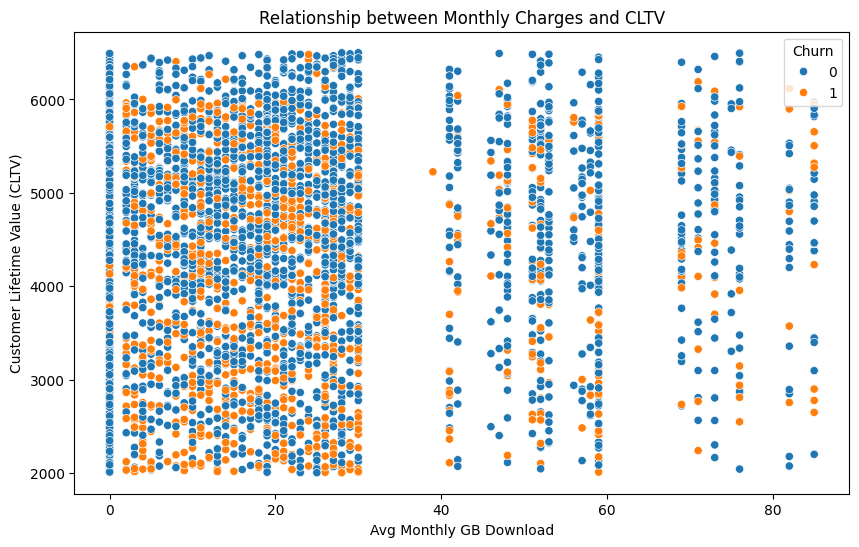

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Monthly GB Download', y='CLTV', hue='Churn', data=train_df)
plt.title('Relationship between Monthly Charges and CLTV')
plt.xlabel('Avg Monthly GB Download')
plt.ylabel('Customer Lifetime Value (CLTV)')
plt.show()

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/test.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/validation.csv')


df = df.drop(columns=['Customer ID', 'Lat Long'], errors='ignore')

# Separate features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

categorical_cols = [col for col in X.columns if col not in numeric_cols]


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

model_filename = 'customer_churn_model.pkl'
joblib.dump(model_pipeline, model_filename)
print(f"Model saved as {model_filename}")

loaded_model = joblib.load(model_filename)

y_loaded_pred = loaded_model.predict(X_test)

loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
loaded_conf_matrix = confusion_matrix(y_test, y_loaded_pred)
loaded_class_report = classification_report(y_test, y_loaded_pred)

print("Loaded Model Accuracy:", loaded_accuracy)
print("Loaded Model Confusion Matrix:\n", loaded_conf_matrix)
print("Loaded Model Classification Report:\n", loaded_class_report)


Accuracy: 1.0
Confusion Matrix:
 [[611   0]
 [  0 234]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       234

    accuracy                           1.00       845
   macro avg       1.00      1.00      1.00       845
weighted avg       1.00      1.00      1.00       845

Model saved as customer_churn_model.pkl
Loaded Model Accuracy: 1.0
Loaded Model Confusion Matrix:
 [[611   0]
 [  0 234]]
Loaded Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       234

    accuracy                           1.00       845
   macro avg       1.00      1.00      1.00       845
weighted avg       1.00      1.00      1.00       845



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/test.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/dvp_project_assets/validation.csv')

leakage_cols = ['Customer ID', 'Lat Long',  'Churn Reason','Churn Category', 'Customer Status',  'Satisfaction Score']
train_df = train_df.drop(columns=leakage_cols, errors='ignore')
test_df = test_df.drop(columns=leakage_cols, errors='ignore')
validation_df = validation_df.drop(columns=leakage_cols, errors='ignore')


X_train = train_df.drop(columns=["Churn"])
y_train = train_df["Churn"]
X_test = test_df.drop(columns=["Churn"])
y_test = test_df["Churn"]
X_validation = validation_df.drop(columns=["Churn"])
y_validation = validation_df["Churn"]


numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = [col for col in X_train.columns if col not in numeric_cols]


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_test_pred = model_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Set Evaluation:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

y_validation_pred = model_pipeline.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_conf_matrix = confusion_matrix(y_validation, y_validation_pred)
validation_class_report = classification_report(y_validation, y_validation_pred)

print("\nValidation Set Evaluation:")
print("Accuracy:", validation_accuracy)
print("Confusion Matrix:\n", validation_conf_matrix)
print("Classification Report:\n", validation_class_report)


Test Set Evaluation:
Accuracy: 0.9261887863733144
Confusion Matrix:
 [[1010   25]
 [  79  295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1035
           1       0.92      0.79      0.85       374

    accuracy                           0.93      1409
   macro avg       0.92      0.88      0.90      1409
weighted avg       0.93      0.93      0.92      1409


Validation Set Evaluation:
Accuracy: 0.9261887863733144
Confusion Matrix:
 [[1015   20]
 [  84  290]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1035
           1       0.94      0.78      0.85       374

    accuracy                           0.93      1409
   macro avg       0.93      0.88      0.90      1409
weighted avg       0.93      0.93      0.92      1409



In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Update the model pipeline to use KNeighborsClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=2))  # You can adjust 'n_neighbors' as needed
])

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = model_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Set Evaluation:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

# Evaluate on the validation set
y_validation_pred = model_pipeline.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_conf_matrix = confusion_matrix(y_validation, y_validation_pred)
validation_class_report = classification_report(y_validation, y_validation_pred)

print("\nValidation Set Evaluation:")
print("Accuracy:", validation_accuracy)
print("Confusion Matrix:\n", validation_conf_matrix)
print("Classification Report:\n", validation_class_report)


NameError: name 'preprocessor' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Update the model pipeline to use DecisionTreeClassifier with constrained parameters
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=3,  # Limit tree depth to reduce complexity
        min_samples_split=10,  # Increase minimum samples required to split
        min_samples_leaf=5     # Increase minimum samples per leaf node
    ))
])

# Fit the model pipeline to the training data
model_pipeline.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = model_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Set Evaluation:")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

# Evaluate on the validation set
y_validation_pred = model_pipeline.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_conf_matrix = confusion_matrix(y_validation, y_validation_pred)
validation_class_report = classification_report(y_validation, y_validation_pred)

print("\nValidation Set Evaluation:")
print("Accuracy:", validation_accuracy)
print("Confusion Matrix:\n", validation_conf_matrix)
print("Classification Report:\n", validation_class_report)


Test Set Evaluation:
Accuracy: 0.915542938254081
Confusion Matrix:
 [[931 104]
 [ 15 359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1035
           1       0.78      0.96      0.86       374

    accuracy                           0.92      1409
   macro avg       0.88      0.93      0.90      1409
weighted avg       0.93      0.92      0.92      1409


Validation Set Evaluation:
Accuracy: 0.915542938254081
Confusion Matrix:
 [[932 103]
 [ 16 358]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1035
           1       0.78      0.96      0.86       374

    accuracy                           0.92      1409
   macro avg       0.88      0.93      0.90      1409
weighted avg       0.93      0.92      0.92      1409



**End of our implementation**

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Feature importance from the Random Forest model
# feature_importances = model_pipeline.named_steps['classifier'].feature_importances_
# features = numeric_cols + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

# # Create a DataFrame for visualization
# feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 8))
# sns.barplot(x='importance', y='feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.show()


In [ ]:
# # Identify top N at-risk customers from the validation set
# at_risk_customers = X_validation.copy()
# at_risk_customers['predicted_churn_probability'] = model_pipeline.predict_proba(X_validation)[:, 1]
# at_risk_customers['actual_churn'] = y_validation

# # Sort by predicted churn probability
# at_risk_customers = at_risk_customers.sort_values(by='predicted_churn_probability', ascending=False)

# # Display top N at-risk customers
# top_n = 10
# print(at_risk_customers.head(top_n))

# # Example strategy: Customer segmentation based on churn risk
# high_risk_customers = at_risk_customers[at_risk_customers['predicted_churn_probability'] > 0.7]
# medium_risk_customers = at_risk_customers[(at_risk_customers['predicted_churn_probability'] <= 0.7) & (at_risk_customers['predicted_churn_probability'] > 0.4)]
# low_risk_customers = at_risk_customers[at_risk_customers['predicted_churn_probability'] <= 0.4]

# # Implement targeted retention strategies here (e.g., personalized offers, customer service follow-ups)
# print(f"High risk customers: {len(high_risk_customers)}")
# print(f"Medium risk customers: {len(medium_risk_customers)}")
# print(f"Low risk customers: {len(low_risk_customers)}")


In [ ]:
# # Example: Basic CLTV calculation (assuming constant monthly revenue per customer)
# monthly_revenue_per_customer = 100
# average_customer_lifespan_months = 36

# # CLTV = Monthly Revenue * Average Customer Lifespan
# high_risk_cltv = len(high_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months
# medium_risk_cltv = len(medium_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months
# low_risk_cltv = len(low_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months

# print(f"Estimated CLTV for high risk customers: {high_risk_cltv}")
# print(f"Estimated CLTV for medium risk customers: {medium_risk_cltv}")
# print(f"Estimated CLTV for low risk customers: {low_risk_cltv}")

# # Analyze the impact of retention strategies on long-term profitability
# # Example: Projected impact of reducing high-risk customer churn by 50%
# reduced_churn_high_risk_cltv = (len(high_risk_customers) * 0.5) * monthly_revenue_per_customer * average_customer_lifespan_months
# print(f"Projected impact on CLTV after reducing high-risk churn by 50%: {reduced_churn_high_risk_cltv}")


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Load data
# train_df = pd.read_csv('/content/train.csv')
# test_df = pd.read_csv('/content/test.csv')
# validation_df = pd.read_csv('/content/validation.csv')

# # Drop columns that might cause data leakage
# leakage_cols = ['Customer ID', 'Lat Long', 'Churn Reason', 'Churn Category', 'Customer Status', 'Satisfaction Score']
# train_df = train_df.drop(columns=leakage_cols, errors='ignore')
# test_df = test_df.drop(columns=leakage_cols, errors='ignore')
# validation_df = validation_df.drop(columns=leakage_cols, errors='ignore')

# # Separate features and target variable
# X_train = train_df.drop(columns=["Churn"])
# y_train = train_df["Churn"]
# X_test = test_df.drop(columns=["Churn"])
# y_test = test_df["Churn"]
# X_validation = validation_df.drop(columns=["Churn"])
# y_validation = validation_df["Churn"]

# # Identify numeric and categorical columns
# numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
# categorical_cols = [col for col in X_train.columns if col not in numeric_cols]

# # Define data transformation pipelines
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numeric_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Define the model pipeline with RandomForestClassifier
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])


# # Fit the model pipeline with training data
# model_pipeline.fit(X_train, y_train)

# # Evaluate on test set
# y_test_pred = model_pipeline.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_conf_matrix = confusion_matrix(y_test, y_test_pred)
# test_class_report = classification_report(y_test, y_test_pred)

# print("Test Set Evaluation:")
# print("Accuracy:", test_accuracy)
# print("Confusion Matrix:\n", test_conf_matrix)
# print("Classification Report:\n", test_class_report)

# # Evaluate on validation set
# y_validation_pred = model_pipeline.predict(X_validation)
# validation_accuracy = accuracy_score(y_validation, y_validation_pred)
# validation_conf_matrix = confusion_matrix(y_validation, y_validation_pred)
# validation_class_report = classification_report(y_validation, y_validation_pred)

# print("\nValidation Set Evaluation:")
# print("Accuracy:", validation_accuracy)
# print("Confusion Matrix:\n", validation_conf_matrix)
# print("Classification Report:\n", validation_class_report)

# # Feature importance analysis
# feature_importances = model_pipeline.named_steps['classifier'].feature_importances_
# features = numeric_cols + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))
# feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(7)  # Select top 7 features

# plt.figure(figsize=(12, 8))
# sns.barplot(x='importance', y='feature', data=feature_importance_df)

In [ ]:
# Describe the dataset to get summary statistics
train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')
validation_stats = validation_df.describe(include='all')

print(" DataFrame Descriptive Statistics:")
print(train_stats)

# print("\nTest DataFrame Descriptive Statistics:")
# print(test_stats)

# print("\nValidation DataFrame Descriptive Statistics:")
# print(validation_stats)

# # Visualizing distributions
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram for numerical features
# numeric_cols = train_df.select_dtypes(include=['number']).columns.tolist()
# for col in numeric_cols:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(train_df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.show()

# # Box plots for numerical features
# for col in numeric_cols:
#     plt.figure(figsize=(10, 4))
#     sns.boxplot(x=train_df[col])
#     plt.title(f'Box Plot of {col}')
#     plt.show()

# # Scatter plots for key attributes
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Tenure', y='CLTV', hue='Churn', data=train_df)
# plt.title('Scatter Plot of Tenure vs CLTV')
# plt.show()


with Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
validation_df = pd.read_csv('/content/validation.csv')

# Drop columns that might cause data leakage
leakage_cols = ['Customer ID', 'Lat Long', 'Churn Reason', 'Churn Category', 'Customer Status', 'Satisfaction Score']
train_df = train_df.drop(columns=leakage_cols, errors='ignore')
test_df = test_df.drop(columns=leakage_cols, errors='ignore')
validation_df = validation_df.drop(columns=leakage_cols, errors='ignore')

# Separate features and target variable
X_train = train_df.drop(columns=["Churn"])
y_train = train_df["Churn"]
X_test = test_df.drop(columns=["Churn"])
y_test = test_df["Churn"]
X_validation = validation_df.drop(columns=["Churn"])
y_validation = validation_df["Churn"]

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = [col for col in X_train.columns if col not in numeric_cols]

# Define data transformation pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the base model pipeline with RandomForestClassifier
base_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=base_model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best model on test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("Test Set Evaluation with Best Model:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_class_report)

# Evaluate the best model on validation data
y_validation_pred = best_model.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_class_report = classification_report(y_validation, y_validation_pred)

print("\nValidation Set Evaluation with Best Model:")
print("Accuracy:", validation_accuracy)
print("Classification Report:\n", validation_class_report)


In [ ]:
# Identify top N at-risk customers from the validation set
at_risk_customers = X_validation.copy()
at_risk_customers['predicted_churn_probability'] = model_pipeline.predict_proba(X_validation)[:, 1]
at_risk_customers['actual_churn'] = y_validation
at_risk_customers = at_risk_customers.sort_values(by='predicted_churn_probability', ascending=False)
top_n = 5
print(at_risk_customers.head(top_n))

# Customer segmentation based on churn risk
high_risk_customers = at_risk_customers[at_risk_customers['predicted_churn_probability'] > 0.7]
medium_risk_customers = at_risk_customers[(at_risk_customers['predicted_churn_probability'] <= 0.7) & (at_risk_customers['predicted_churn_probability'] > 0.4)]
low_risk_customers = at_risk_customers[at_risk_customers['predicted_churn_probability'] <= 0.4]

print(f"High risk customers: {len(high_risk_customers)}")
print(f"Medium risk customers: {len(medium_risk_customers)}")
print(f"Low risk customers: {len(low_risk_customers)}")

# Basic CLTV calculation and impact analysis
monthly_revenue_per_customer = 100
average_customer_lifespan_months = 36

high_risk_cltv = len(high_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months
medium_risk_cltv = len(medium_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months
low_risk_cltv = len(low_risk_customers) * monthly_revenue_per_customer * average_customer_lifespan_months

print(f"Estimated CLTV for high risk customers: {high_risk_cltv}")
print(f"Estimated CLTV for medium risk customers: {medium_risk_cltv}")
print(f"Estimated CLTV for low risk customers: {low_risk_cltv}")

reduced_churn_high_risk_cltv = (len(high_risk_customers) * 0.5) * monthly_revenue_per_customer * average_customer_lifespan_months
print(f"Projected impact on CLTV after reducing high-risk churn by 50%: {reduced_churn_high_risk_cltv}")